# This is a homework 1 for CSC588 Statistical Learning Course
# Done by Ivan Akinfiev 

## Problem 3 (a)

In [182]:
import random as rn
import numpy as np
import pandas as pd 
from typing import List
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [183]:
def generate_data(n, lam):
    data = pd.DataFrame([], columns=['x_1', 'x_2', 'y'])
    count = 0
    w_star = (1/math.sqrt(2), 1/math.sqrt(2))
    while True:
        if count == 100:
            break
        x_1 = np.random.uniform(-1,1)
        x_2 = np.random.uniform(-1,1)
        x_i = np.array([x_1,x_2])
        norm = np.linalg.norm(x_i, ord=2)
        if norm <= 1:     
            wx_dot = np.dot(x_i, w_star)
            if np.abs(wx_dot) >= lam:
                data.loc[count] = (x_i[0], x_i[1], np.sign(wx_dot))
                count += 1
        else:
            continue

    return data






In [184]:
sample_1000 = generate_data(1000, 1/32 )
sample_1000


,x_1,x_2,y
0,0.674784,0.725267,1.0
1,-0.070499,0.164507,1.0
2,0.450652,0.868578,1.0
3,-0.349743,0.585122,1.0
4,0.689690,-0.443372,1.0
...,...,...,...
95,0.917646,0.156360,1.0
96,0.421018,-0.477098,-1.0
97,0.099294,0.412670,1.0
98,0.917389,0.178514,1.0


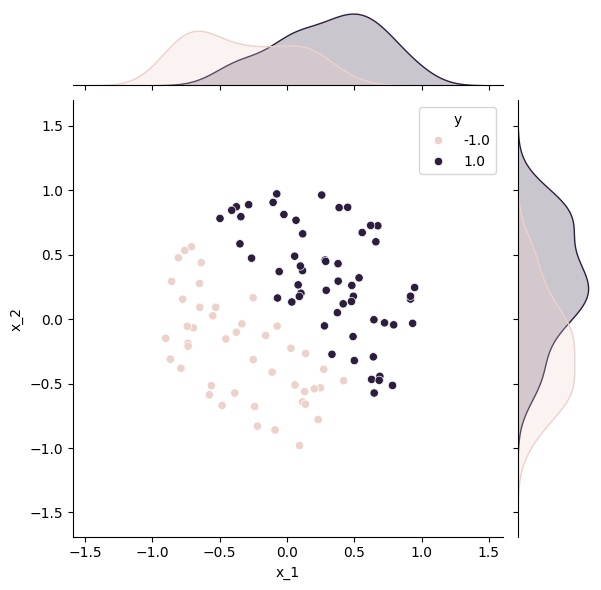

In [185]:
sns.jointplot(data=sample_1000, x='x_1', y='x_2', hue='y')

### (b)

,m,dot,norm
0,0.0,0.000000,0.000000
1,1.0,0.141873,0.587492
2,2.0,0.231446,0.328556
3,3.0,0.259486,0.708892


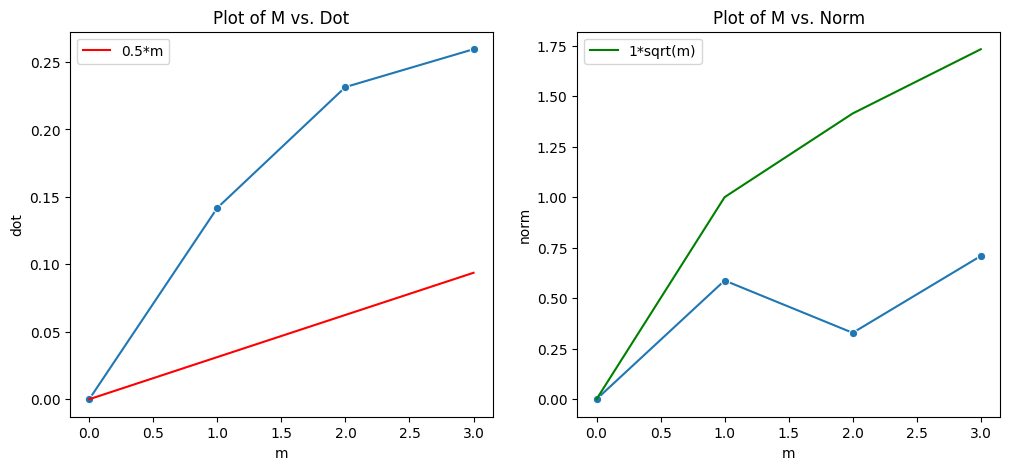

In [186]:
def sim_perceptron(data: pd.DataFrame, lam = 1/32):
    data_for_plot = pd.DataFrame([], columns=['m', 'dot', 'norm'])
    w_iter = np.array([0,0])
    w_star = np.array([0.5, 0.5])
    M = 0 
    for iteration in range(len(data)):
        y_true = data.iloc[iteration,2]
        y_hat = np.sign(np.dot((data.iloc[iteration,0],data.iloc[iteration,1]), w_iter))
        if y_hat == 0: y_hat = 1
        if y_hat == y_true:
            continue
        else:
            norma = np.linalg.norm(w_iter,2)
            dots = np.dot(w_iter,w_star)
            w_iter = w_iter + np.array([y_true*data.iloc[iteration,0], y_true*data.iloc[iteration,1]])
            data_for_plot.loc[M] = [M, dots, norma]
            M += 1
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.lineplot(ax=axes[0], x='m', y='dot', data=data_for_plot, marker='o')
    axes[0].set_title('Plot of M vs. Dot')
    axes[0].plot(data_for_plot['m'], lam * data_for_plot['m'], label='0.5*m', color='red')
    axes[0].legend()
    sns.lineplot(ax=axes[1], x='m', y='norm', data=data_for_plot, marker='o')
    axes[1].set_title('Plot of M vs. Norm')
    axes[1].plot(data_for_plot['m'], np.sqrt(data_for_plot['m']), label='1*sqrt(m)', color='green')
    axes[1].legend() 
    
    return data_for_plot
            
            
            
            
            

sim_perceptron(sample_1000)

Indeed, as we see, the graphs give us the correct bounds for both dot products and norms.